In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
%matplotlib inline

In [2]:
path = '../../data/twitter/train.csv'
tweets = pd.read_csv(path,dtype={'target':'category','keyword':'category'})


In [3]:
tweets.sample(10)

,id,keyword,location,text,target
4883,6953,massacre,"St. Louis, Mo",This Friday!! Palm Beach County #Grindhouse Se...,0
5143,7334,nuclear%20reactor,"Washington, D.C.",Salem 2 nuclear reactor shut down over electri...,1
4659,6625,inundated,"UK, Republic of Ireland and Australia",Inundated with employee holiday request paperw...,0
5121,7302,nuclear%20reactor,NaN,Quick Fact: No #nuclear reactor has come into ...,0
202,285,ambulance,NaN,http://t.co/X5YEUYLT1X Twelve feared killed in...,1
1602,2312,collapse,"Jubail IC, Saudi Arabia",@BasilDudin The 'barbaric Saudies' as you said...,0
1864,2679,crush,San Fransokyo,I have the biggest crush on you &amp; I dont k...,0
7099,10172,violent%20storm,NaN,Storm batters Auckland and Northland: A violen...,1
7359,10536,windstorm,NaN,Windstorm lastingness perquisite - acquiesce i...,1
2095,3011,death,New York,Xbox 360 Pro Console - *Red Ring of Death* - F...,0


In [4]:
def translateTargetValue(x):
    if x=='1':
        return "Real"
    elif x=='0':
        return "Fake"
    return x
   

In [5]:
print(translateTargetValue('1'))

Real


In [6]:
tweets.rename(columns={'target':'veracity'},inplace=True)

In [7]:
tweets['veracity'] = tweets['veracity'].apply(lambda x : translateTargetValue(x))

In [8]:
tweets[tweets['veracity']  == 'Real'].count()

id          3271
keyword     3229
location    2196
text        3271
veracity    3271
dtype: int64

In [9]:
tweets[tweets['veracity']  == 'Fake'].count()

id          4342
keyword     4323
location    2884
text        4342
veracity    4342
dtype: int64

In [89]:
tweets.groupby(['text']).agg({'id':'size'})

,id
text,
! Residents Return To Destroyed Homes As Washington Wildfire Burns on http://t.co/UcI8stQUg1,1
# handbags Genuine Mulberry Antony Cross Body Messenger Bag Dark Oak Soft Buffalo Leather: å£279.00End Date: W... http://t.co/FTM4RKl8mN,1
#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/9Naw3QOQOL,1
#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/aOd2ftBMGU,1
#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/eaTFro3d5x,1
...,...
Û÷We Can HelpÛª Says Denver Firefighter Working To Curb First Responder Suicide http://t.co/WtaFaepuKZ,1
å_? New Ladies Shoulder Tote #Handbag Faux Leather Hobo Purse Cross Body Bag #Womens http://t.co/zujwUiomb3 http://t.co/YklTFj1FnC,1
å¤} New Ladies Shoulder Tote #Handbag Faux Leather Hobo Purse Cross Body Bag #Womens http://t.co/UooZXauS26 http://t.co/6MGBizjfgd RT enÛ_,1


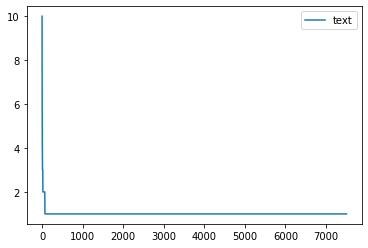

In [92]:
tweets.text.value_counts().reset_index().plot()

In [10]:
tweets['lan'] = tweets.text.apply(lambda x :detect(x))

In [11]:
tweets.lan.unique()

array(['en', 'no', 'so', 'sl', 'fr', 'af', 'sw', 'it', 'ca', 'da', 'de',
       'nl', 'cy', 'sv', 'id', 'hr', 'tl', 'pt', 'ro', 'es', 'tr', 'et',
       'fi', 'sq', 'vi', 'pl', 'lt', 'sk'], dtype=object)

In [12]:
tweets_by_lan = tweets.groupby(['lan']).agg({'lan':['size']})

In [13]:
tweets_by_lan.sample(2)

,lan
,size
lan,
tr,2
es,12


In [14]:
level0 = tweets_by_lan.columns.get_level_values(0)

In [15]:
level1 = tweets_by_lan.columns.get_level_values(1)

In [16]:
tweets_by_lan.columns = level0 + '_' + level1

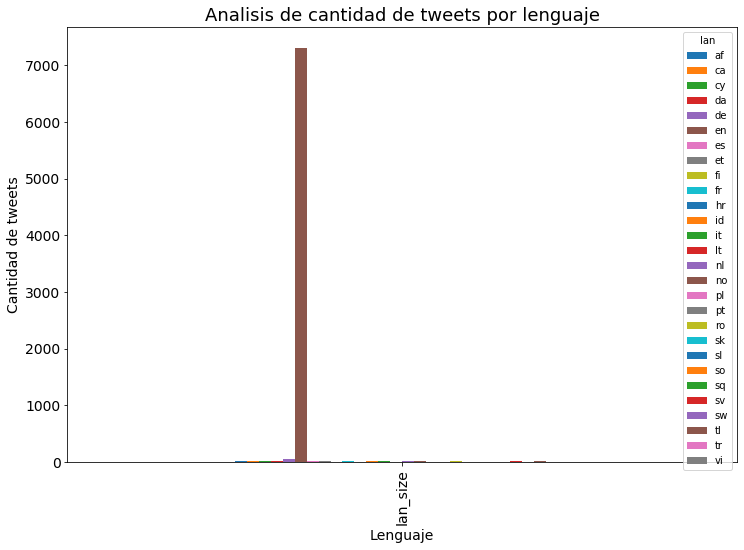

In [17]:
tweets_by_lan.T.plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Analisis de cantidad de tweets por lenguaje',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14);
ax.set_xlabel('Lenguaje',fontsize=14);

In [35]:
lan_not_en = (tweets['lan'] == 'en')

In [21]:
real_tweet = tweets['veracity'] == 'Real'

In [36]:
lan_not_en + real_tweet

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


0       True
1       True
2       True
3       True
4       True
        ... 
7608    True
7609    True
7610    True
7611    True
7612    True
Length: 7613, dtype: bool

In [42]:
tweets[tweets.lan != 'en'][tweets.veracity == 'Real']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,keyword,location,text,veracity,lan
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,Real,no
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,Real,it
65,93,ablaze,Birmingham,@nxwestmidlands huge fire at Wholesale markets...,Real,da
86,128,accident,"New Hanover County, NC",FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;NHS;999...,Real,de
89,131,accident,"Wilmington, NC",;ACCIDENT PROPERTY DAMAGE; PINER RD/HORNDALE DR,Real,de
...,...,...,...,...,...,...
7145,10239,volcano,"cleveland, oh",@alextucker VOLCANO BOWL DRINK,Real,de
7176,10284,war%20zone,T-Ville,Looks like a war zone outside. What's going on?,Real,af
7495,10722,wreck,"Greenville, S.C.",Greer man dies in wreck http://t.co/n2qZbMZuly,Real,af
7530,10768,wreckage,NaN,Wreckage is MH370: Najib\nhttp://t.co/iidKC0jS...,Real,sw


## Analizar tweets con hashtag '#'

In [48]:
'http' in "https://hasdkja"

True

In [ ]:
def containHashtag(text) :
    return '#' in text

In [45]:
tweets['hashtag'] = tweets.text.apply(lambda x: '#' in x)

In [46]:
tweets.groupby(['hashtag']).agg({'veracity':['size']})

,veracity
,size
hashtag,
False,5852
True,1761


In [50]:
tweets['link'] = tweets.text.apply(lambda x: 'http' in x)

In [51]:
tweets.text.apply(lambda x: 'http' in x)

0       False
1       False
2       False
3       False
4       False
        ...  
7608     True
7609    False
7610     True
7611    False
7612     True
Name: text, Length: 7613, dtype: bool

In [52]:
tweets.groupby(['link']).agg({'veracity':['size']})

,veracity
,size
link,
False,3642
True,3971


In [53]:
tweets['arroba'] = tweets.text.apply(lambda x: '@' in x)

In [54]:
tweets.groupby(['arroba']).agg({'veracity':['size']})

,veracity
,size
arroba,
False,5574
True,2039


In [62]:
def containAnyReference(text):
    return '@' in text or '#' in text or 'http' in text

In [63]:
containAnyReference("Buenas tardes CoachCMorales")

False

In [64]:
containAnyReference("Buenas tardes @CoachCMorales")

True

In [65]:
containAnyReference("Buenas tardes https://tw.sample")

True

In [66]:
containAnyReference("Buenas tardes #Shini")

True

In [67]:
containAnyReference("Buenas tardes @CoachCMorales https://tw.sample #Shini")

True

In [68]:
tweets['any_reference'] = tweets.text.apply(lambda x: containAnyReference(x))

In [69]:
tweets.groupby(['any_reference']).agg({'veracity':['size']})

,veracity
,size
reference,
False,1844
True,5769


In [74]:
def containAllReference(text):
    return '@' in text and '#' in text and 'http' in text

In [75]:
containAllReference("Buenas tardes CoachCMorales")

False

In [76]:
containAllReference("Buenas tardes @CoachCMorales")

False

In [77]:
containAllReference("Buenas tardes https://tw.sample")

False

In [78]:
containAllReference("Buenas tardes #Shini")

False

In [79]:
containAllReference("Buenas tardes @CoachCMorales https://tw.sample #Shini")

True

In [88]:
tweets[tweets['text'].apply(lambda x: containAllReference(x)) and tweets['veracity']=='Real']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [83]:
tweets.groupby(['all_reference']).agg({'veracity':['size']})

,veracity
,size
all_reference,
False,7405
True,208


In [21]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int64   
 1   keyword   7552 non-null   category
 2   location  5080 non-null   object  
 3   text      7613 non-null   object  
 4   veracity  7613 non-null   category
 5   lan       7613 non-null   object  
dtypes: category(2), int64(1), object(3)
memory usage: 262.2+ KB


In [12]:
len(tweets.location.unique())

3342

##### Agregamos una columna con la longitud de los tweets

In [13]:
tweets['tweets_length'] = tweets['text'].apply(lambda x : len(x))

In [14]:
tweets.sample(5)

,id,keyword,location,text,veracity,tweets_length
7057,10111,upheaval,"Washington, D.C.",USW: 'The damage from abandoning the deal coul...,Fake,129
753,1085,blew%20up,NaN,@BenKin97 @Mili_5499 remember when u were up l...,Real,136
1200,1726,buildings%20burning,NaN,kou is like [CASH REGISTER] [BUILDINGS BURNING],Fake,47
4210,5981,hazard,NaN,@ArianaGrande Girl you still lickin' public d...,Fake,93
3385,4847,evacuation,"ÌÏT: 43.631838,-79.55807",INK Entertainment Addresses Veld Evacuation an...,Fake,104


In [15]:
tweets.describe()

,id,tweets_length
count,7613.000000,7613.000000
mean,5441.934848,101.037436
std,3137.116090,33.781325
min,1.000000,7.000000
25%,2734.000000,78.000000
50%,5408.000000,107.000000
75%,8146.000000,133.000000
max,10873.000000,157.000000


In [16]:
print("Cantidad de tweets falsos " +tweets[tweets['veracity']  == 'Fake'].id.count().astype(str))

Cantidad de tweets falsos 4342


In [17]:
print("Cantidad de tweets reales " +tweets[tweets['veracity']  == 'Real'].id.count().astype(str))

Cantidad de tweets reales 3271


In [18]:
false_tweets_decribe = tweets[tweets['veracity']  == 'Fake']['tweets_length'].describe().reset_index().loc[1:].rename(columns={'index':'description'})

In [19]:
fakeIndex = ['Fake','Fake','Fake','Fake','Fake','Fake','Fake']

In [20]:
false_tweets_decribe.index = fakeIndex

In [21]:
false_tweets_decribe.columns

Index(['description', 'tweets_length'], dtype='object')

In [22]:
false_tweets_decribe.pivot(columns='description',values='tweets_length').unstack().reset_index()

,description,level_1,0
0,25%,Fake,68.000000
1,50%,Fake,101.000000
2,75%,Fake,130.000000
3,max,Fake,157.000000
4,mean,Fake,95.706817
5,min,Fake,7.000000
6,std,Fake,35.885924


In [23]:
false_tweets_decribe.pivot(columns='description',values='tweets_length').stack()

      description
Fake  25%             68.000000
      50%            101.000000
      75%            130.000000
      max            157.000000
      mean            95.706817
      min              7.000000
      std             35.885924
dtype: float64

In [24]:
pd.DataFrame(false_tweets_decribe.pivot(columns='description',values='tweets_length').stack())

0
     description            
Fake 25%           68.000000
     50%          101.000000
     75%          130.000000
     max          157.000000
     mean          95.706817
     min            7.000000
     std           35.885924

In [25]:
tweets[tweets['veracity']  == 'Real']['tweets_length'].describe()

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: tweets_length, dtype: float64

In [26]:
true_tweets_decribe = tweets[tweets['veracity']  == 'Real']['tweets_length'].describe().reset_index()\
.loc[1:].rename(columns={'index':'description'})

In [27]:
tweets[tweets['veracity']  == 'Real']['tweets_length'].describe().reset_index()\
.loc[1:].rename(columns={'index':'description'})

,description,tweets_length
1,mean,108.113421
2,std,29.309854
3,min,14.000000
4,25%,88.000000
5,50%,115.000000
6,75%,136.000000
7,max,151.000000


tweets.groupby(['veracity']).agg({'tweets_length':['mean','std']})

In [28]:
tweets_by_target = tweets.groupby(['veracity']).agg({'tweets_length':['mean','std']})

In [29]:
tweets_by_target.columns

MultiIndex([('tweets_length', 'mean'),
            ('tweets_length',  'std')],
           )

In [30]:
tweets_by_target.pivot()

KeyError: 'None of [None] are in the columns'

tweets_by_target_reshape = tweets_by_target.stack().reset_index()

tweets_by_target_reshape

tweets_by_target_reshape['veracity'] = tweets_by_target_reshape['veracity'].apply(lambda x : 'Real' if x == '0' else 'Fake')

###  2. Realizar una visualización que permita comunicar los resultados del punto 1.

In [37]:
tweets_by_target = tweets.groupby(['veracity']).agg({'tweets_length':['mean','max','min']})

In [46]:
level0 = tweets_by_target.columns.get_level_values(0)

In [48]:
level1 = tweets_by_target.columns.get_level_values(1)

In [69]:
tweets_by_target.columns = level1

In [71]:
tweets_by_target

,mean,max,min
veracity,,,
Fake,95.706817,157,7
Real,108.113421,151,14


In [73]:
tweets_by_target.T

veracity,Fake,Real
mean,95.706817,108.113421
max,157.000000,151.000000
min,7.000000,14.000000


tweets_by_target.set_index(['tweets_length'])

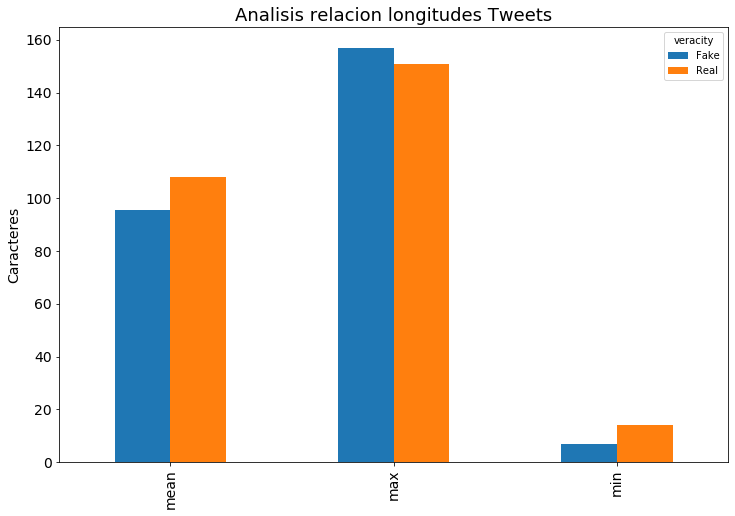

In [108]:
tweets_by_target.T.plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Analisis relacion longitudes Tweets',fontsize=18)
ax.set_ylabel('Caracteres',fontsize=14);

## tweets_by_target.plot(kind='bar',title='Description Tweets',linewidth=5,figsize=(10,6))

ax=plt.gca()
ax.set_ylabel('Tweets Length');
ax.set_xlabel('Veracity')

En el grafico anterior se compara la media de la longitud, y el desvio estandar de los tweets que contienen noticias falsas como reales. Como podran ver la direfencia no es significativa por lo cual no es algo de lo que nos podramos aferrar para diferencias noticias faltas de veridicas. 

Para continuar con un mejor estudio es necesario poder analizar en contenido de dichos tweets, como por ejemplo las palabras usadas y la frecuencia con la que ciertas palabras se utilizan.

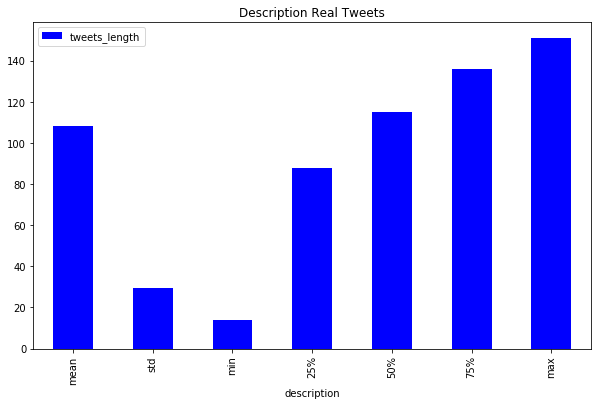

In [32]:
true_tweets_decribe.plot(kind='bar',title='Description Real Tweets'
                         ,linewidth=2,figsize=(10,6), color='blue',x='description',y='tweets_length');


In [33]:
false_tweets_decribe

,description,tweets_length
Fake,mean,95.706817
Fake,std,35.885924
Fake,min,7.000000
Fake,25%,68.000000
Fake,50%,101.000000
Fake,75%,130.000000
Fake,max,157.000000


In [34]:

false_tweets_decribe.pivot(columns='description',values='tweets_length')\
.plot(kind='bar',title='Description Fale Tweets'
                         ,linewidth=2,figsize=(10,6),x='Index');

KeyError: 'Index'